In [2]:
from platform import python_version

print(python_version())

3.6.13


In [1]:
import tensorflow as tf
tf.version.VERSION

'2.0.0'

In [3]:
import pandas as pd
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# X_train[0]

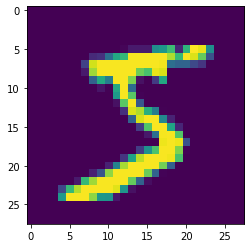

In [8]:
plt.imshow(X_train[0])

## Data preprocessing

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train_cat = to_categorical(y_train, num_classes=10)

In [11]:
y_test_cat = to_categorical(y_test, num_classes=10)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
# we have to reshape our training data into num rows, width, height and color channel
X_train = X_train.reshape(60000, 28, 28, 1)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
X_test = X_test.reshape(10000, 28, 28, 1)

## Training the model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Flatten

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
model.fit(X_train,y_train_cat,epochs=50,validation_data=(X_test,y_test_cat),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 260us/sample - loss: 0.1393 - accuracy: 0.9584 - val_loss: 0.0601 - val_accuracy: 0.9808
Epoch 2/50
60000/60000 [==============================] - 15s 251us/sample - loss: 0.0471 - accuracy: 0.9859 - val_loss: 0.0395 - val_accuracy: 0.9866
Epoch 3/50
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0400 - val_accuracy: 0.9865
Epoch 4/50
60000/60000 [==============================] - 15s 254us/sample - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0380 - val_accuracy: 0.9879
Epoch 5/50
60000/60000 [==============================] - 15s 250us/sample - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0661 - val_accuracy: 0.9790
Epoch 6/50
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0416 - val_accuracy: 0.9873


In [26]:
losses = pd.DataFrame(model.history.history)

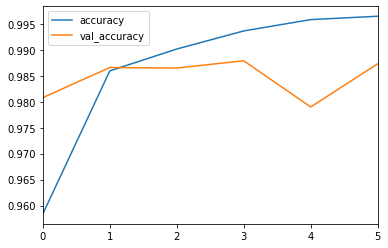

In [27]:
losses[['accuracy','val_accuracy']].plot()

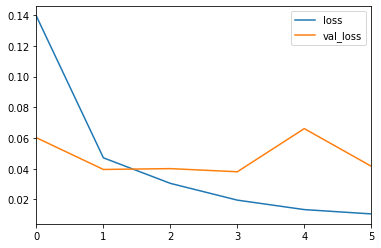

In [28]:
losses[['loss','val_loss']].plot()

In [30]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test_cat,verbose=0))

['loss', 'accuracy']
[0.041580840169238215, 0.9873]


In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [38]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [41]:
confusion_matrix(y_test,predictions)

array([[ 976,    0,    0,    0,    0,    1,    1,    0,    1,    1],
       [   1, 1128,    0,    1,    0,    1,    2,    1,    0,    1],
       [   1,    0, 1010,    0,    1,    0,    2,    9,    9,    0],
       [   1,    0,    0,  997,    0,    6,    0,    2,    3,    1],
       [   0,    0,    1,    0,  967,    0,    5,    1,    0,    8],
       [   2,    0,    0,    5,    0,  881,    2,    0,    2,    0],
       [   5,    3,    0,    0,    1,    1,  946,    0,    2,    0],
       [   0,    3,    2,    0,    0,    0,    0, 1017,    1,    5],
       [   5,    0,    1,    0,    0,    1,    0,    2,  963,    2],
       [   2,    2,    0,    1,    8,    4,    0,    2,    2,  988]],
      dtype=int64)